In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis of Movie Lens

In [4]:
df_links = pd.read_csv('data/ml-latest-small/links.csv')
df_movies = pd.read_csv('data/ml-latest-small//movies.csv')
df_ratings = pd.read_csv('data/ml-latest-small//ratings.csv')
df_tags = pd.read_csv('data/ml-latest-small//tags.csv')

In [42]:
num_movies = df_movies.shape[0]
print(f"\nNumber of movies: {num_movies}")

# Number of ratings
num_ratings = df_ratings.shape[0]
print(f"Number of ratings: {num_ratings}")



Number of movies: 86537
Number of ratings: 33832162


In [15]:
# df_links
df_movies
# df_ratings
# df_tags

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [4]:
FILE_PATH = 'data/ml-latest'
df_links = pd.read_csv(f'{FILE_PATH}/links.csv')
df_movies = pd.read_csv(f'{FILE_PATH}/movies.csv')
df_ratings = pd.read_csv(f'{FILE_PATH}/ratings.csv')
df_tags = pd.read_csv(f'{FILE_PATH}/tags.csv')

df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


#### Filtering animation movies

In [32]:
# Filter Animation Movies
animation_movies = df_movies[df_movies['genres'].str.contains('Animation', na=False)]
# print(animation_movies.head())

# Merge ratings with animation movies
animation_ratings = pd.merge(df_ratings, animation_movies, on='movieId')
# print(animation_ratings.head())

In [31]:

# Summary statistics for animation movie ratings
print(animation_ratings.drop(columns=['movieId', 'userId']).describe())

             rating     timestamp
count  2.329566e+06  2.329566e+06
mean   3.615561e+00  1.334177e+09
std    1.043998e+00  2.456323e+08
min    5.000000e-01  8.228736e+08
25%    3.000000e+00  1.128303e+09
50%    4.000000e+00  1.424401e+09
75%    4.500000e+00  1.539945e+09
max    5.000000e+00  1.689839e+09


In [30]:
# # Average rating for animation movies
# avg_rating_animation = animation_ratings.groupby('title')['rating'].mean().sort_values(ascending=False)
# print(avg_rating_animation.head(15))

### Distribution of ratings for animation movies

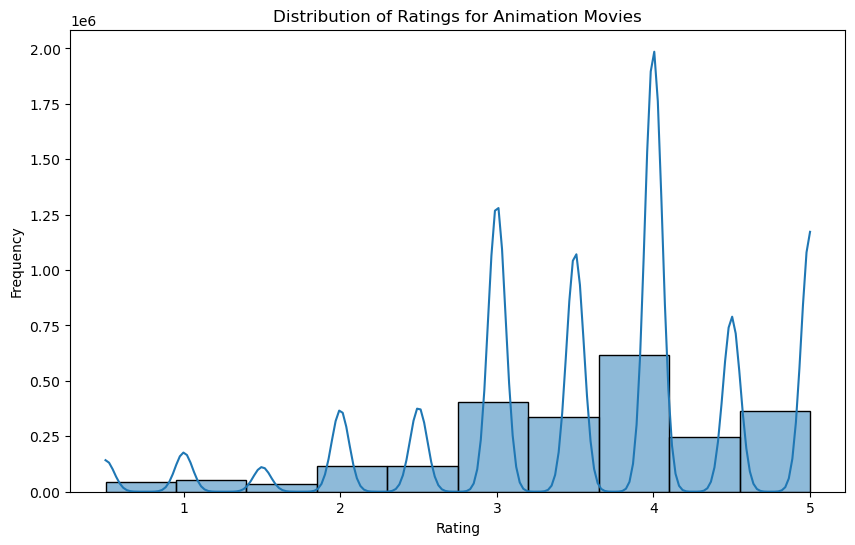

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(animation_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings for Animation Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('images/movie_lens/distribution_of_ratings_for_animation_movies.png')
plt.show()

title
Toy Story (1995)               76813
Shrek (2001)                   58529
Aladdin (1992)                 55808
Lion King, The (1994)          53509
Monsters, Inc. (2001)          48441
Finding Nemo (2003)            48124
Beauty and the Beast (1991)    45404
Incredibles, The (2004)        42953
WALL·E (2008)                  42033
Up (2009)                      38751
Name: count, dtype: int64


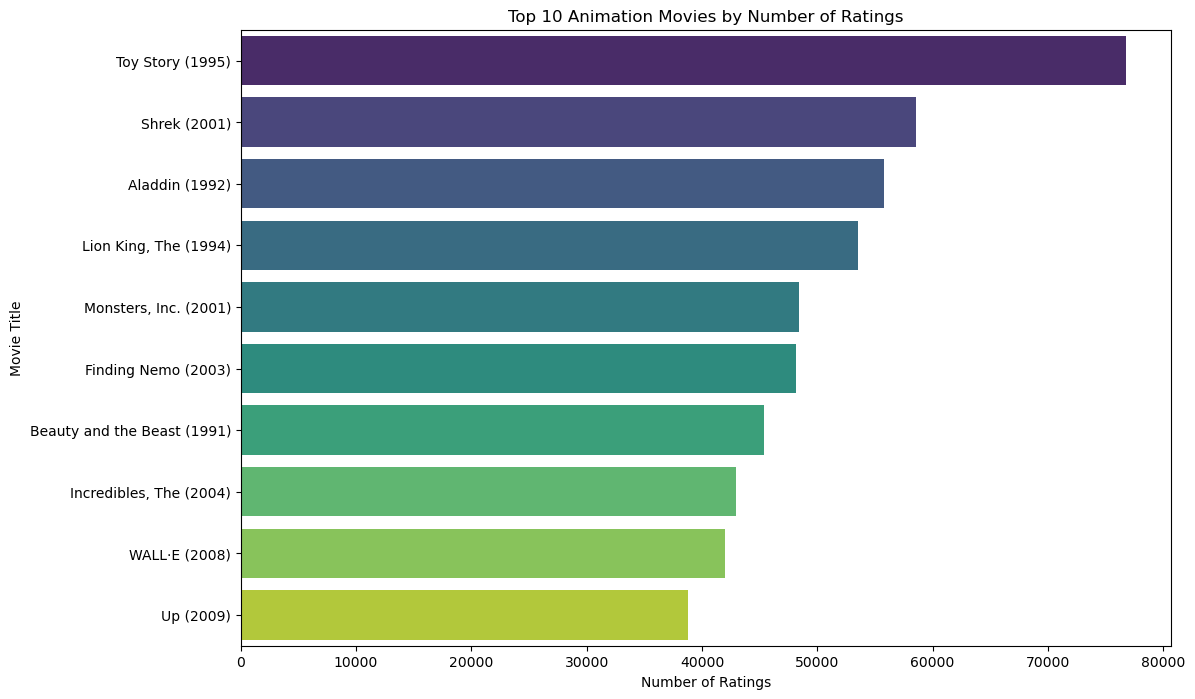

In [26]:
# Number of ratings per animation movie
ratings_per_movie = animation_ratings['title'].value_counts()
print(ratings_per_movie.head(10))

# Visualization of the number of ratings for top 10 animation movies
top_10_rated_animation = ratings_per_movie.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_rated_animation.values, y=top_10_rated_animation.index, palette='viridis')
plt.title('Top 10 Animation Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

In [29]:
df_tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328310,330923,176599,politically correct,1507547491
2328311,330933,3317,coming of age,1351279384
2328312,330933,3317,sexuality,1351279389
2328313,330947,5782,Not Luc Besson,1154110902


title
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    3686
WALL·E (2008)                                           2236
Up (2009)                                               1962
Spider-Man: Into the Spider-Verse (2018)                1832
Princess Mononoke (Mononoke-hime) (1997)                1687
Akira (1988)                                            1491
Inside Out (2015)                                       1473
Toy Story (1995)                                        1440
Howl's Moving Castle (Hauru no ugoku shiro) (2004)      1405
My Neighbor Totoro (Tonari no Totoro) (1988)            1319
Name: count, dtype: int64


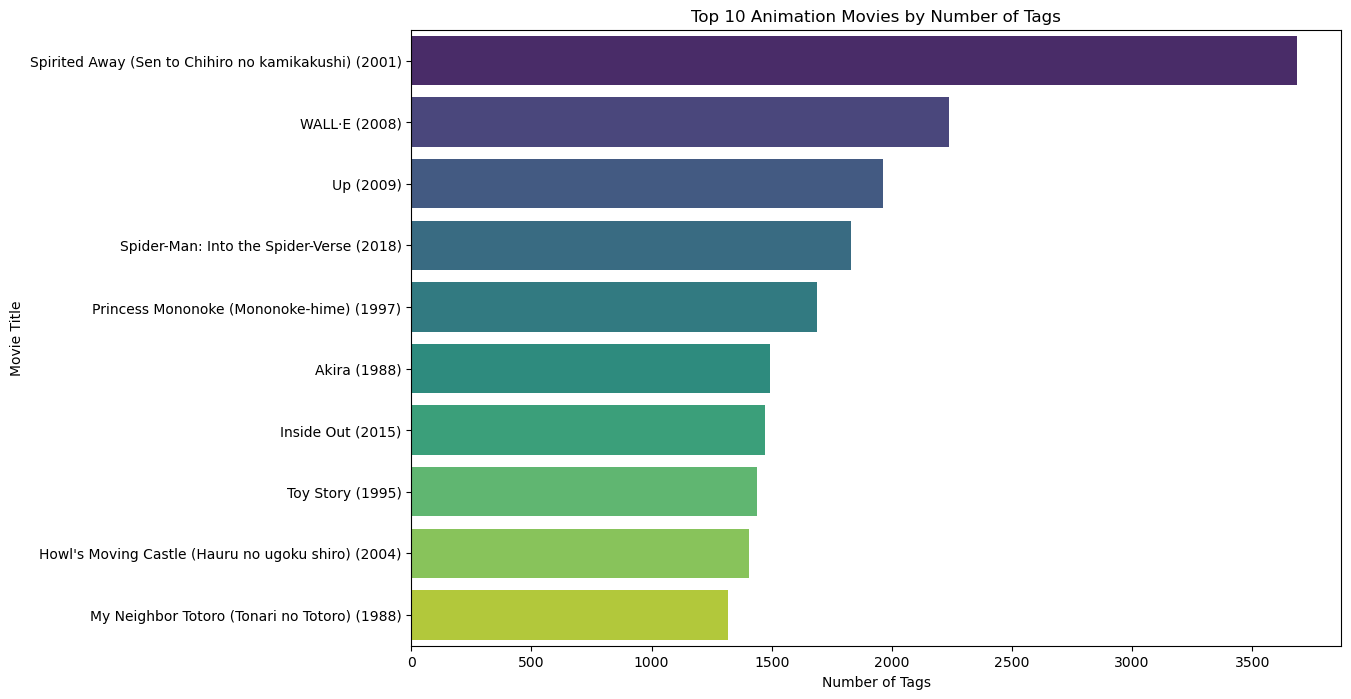

In [27]:
# Most frequently tagged animation movies
animation_tags = pd.merge(df_tags, animation_movies, on='movieId')
tags_per_movie = animation_tags['title'].value_counts()
print(tags_per_movie.head(10))

# Visualization of the most frequently tagged animation movies
top_10_tagged_animation = tags_per_movie.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_tagged_animation.values, y=top_10_tagged_animation.index, palette='viridis')
plt.title('Top 10 Animation Movies by Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Movie Title')
plt.show()

In [6]:
df_tags.dropna(inplace=True)
df_links.dropna(inplace=True)

In [9]:
print(df_ratings.drop(columns=['userId', 'movieId']).describe())


             rating     timestamp
count  3.383216e+07  3.383216e+07
mean   3.542540e+00  1.269362e+09
std    1.063959e+00  2.541023e+08
min    5.000000e-01  7.896520e+08
25%    3.000000e+00  1.046718e+09
50%    4.000000e+00  1.264740e+09
75%    4.000000e+00  1.496919e+09
max    5.000000e+00  1.689843e+09


In [23]:
unique_ratings = df_ratings['rating'].unique()
print(unique_ratings)

[4.  4.5 5.  3.5 3.  2.  2.5 1.  1.5 0.5]


In [36]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


     movieId                    title  \
0          1         Toy Story (1995)   
12        13             Balto (1995)   
47        48        Pocahontas (1995)   
236      239    Goofy Movie, A (1995)   
241      244  Gumby: The Movie (1995)   

                                          genres    year  
0    Adventure|Animation|Children|Comedy|Fantasy  1995.0  
12                  Adventure|Animation|Children  1995.0  
47      Animation|Children|Drama|Musical|Romance  1995.0  
236            Animation|Children|Comedy|Romance  1995.0  
241                           Animation|Children  1995.0  
year
1878.0      1
1885.0      1
1892.0      1
1894.0      1
1900.0      1
         ... 
2019.0    167
2020.0    134
2021.0    138
2022.0    101
2023.0     21
Name: count, Length: 122, dtype: int64


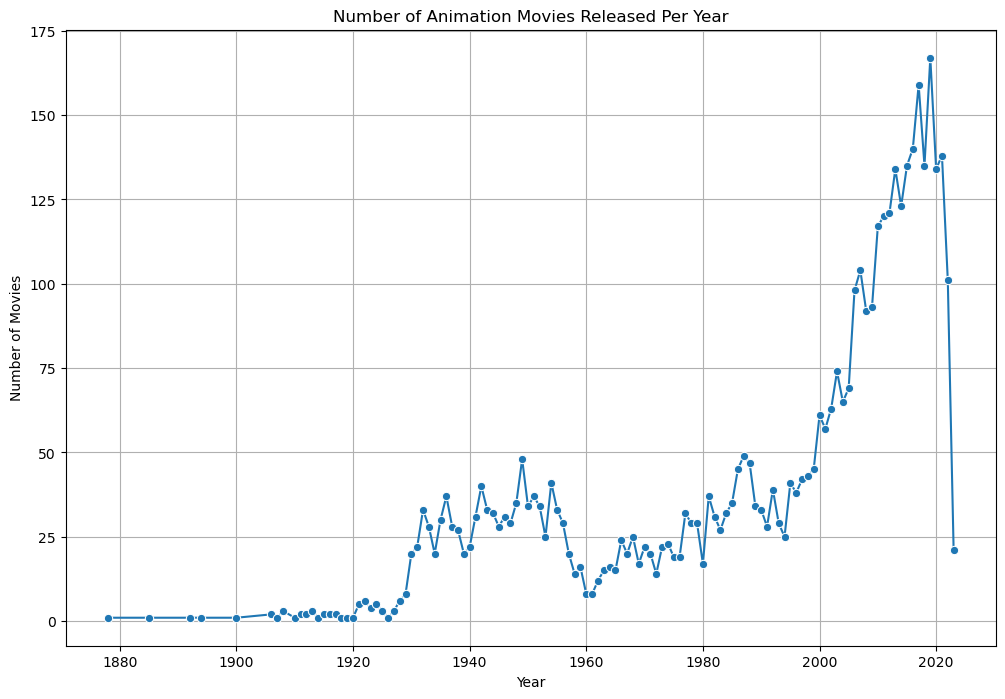

In [45]:

# Extract year from movie titles
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies['year'] = pd.to_numeric(df_movies['year'], errors='coerce')

# Filter Animation Movies
animation_movies = df_movies[df_movies['genres'].str.contains('Animation', na=False)]
print(animation_movies.head())

# Count the number of animation movies released per year
animation_movies_per_year = animation_movies['year'].value_counts().sort_index()
print(animation_movies_per_year)

# Plot the number of animation movies released per year
plt.figure(figsize=(12, 8))
sns.lineplot(x=animation_movies_per_year.index, y=animation_movies_per_year.values, marker='o')
plt.title('Number of Animation Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.savefig('images/movie_lens/animation_movies_per_year.png')
plt.grid(True)
plt.show()